In [13]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day13/monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


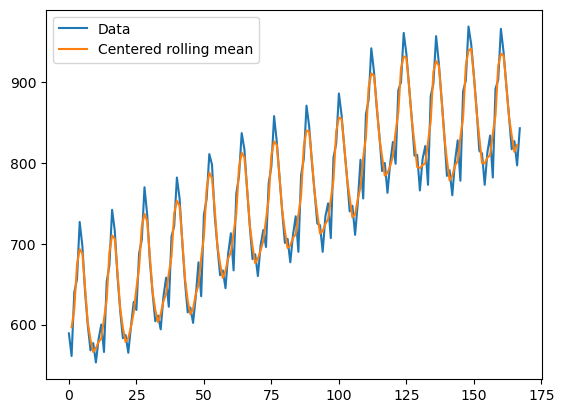

In [6]:
y=df['Milk']
#centered rolling mean

span = 3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label='Centered rolling mean')
plt.legend(loc='best')
plt.show()

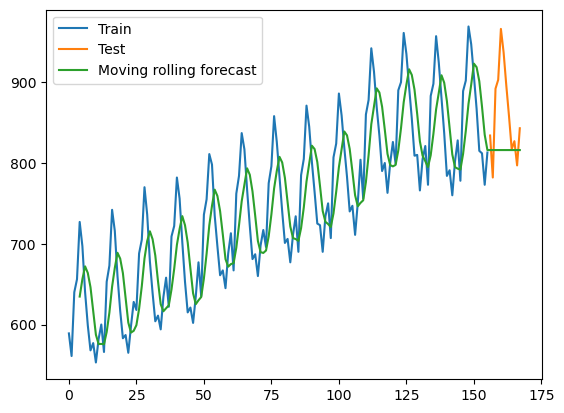

In [17]:
#Trailing rolling mean

y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
span = 5
fcast = y_train.rolling(span).mean()
#retriving last one
MA = fcast.iloc[-1]
#forming series
MA_series = pd.Series(MA.repeat(len(y_test)))
#concatenating
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Moving rolling forecast')
plt.legend(loc='best')
plt.show()

In [18]:
rms = np.sqrt(mean_squared_error(y_test, MA_series))
rms

71.4970861877135

In [ ]:
#for span = 3 ,  83.33766655400582
#for span = 4 , 80.40146661183074
#for span = 5 , 71.4970861877135